In [1]:
import sys

In [2]:
sys.path.append("../../")
sys.path.append("../")
sys.path.append('/Users/evgenia_k/Desktop/Y_Data/CitrusX_prj_New/xai-compare')

In [3]:
from sklearn.model_selection import train_test_split

# custom modules
from mlops_prj_ydata.dataset import german_credit_data, bank_marketing
from models.models import XGBClassifierWrapper

from xai_compare.comparison import FeatureElimination

import warnings
warnings.filterwarnings("ignore") 

2024-07-18 16:32:46.362 | INFO     | mlops_prj_ydata.config:<module>:11 - PROJ_ROOT path is: /Users/evgenia_k/Desktop/Y_Data/MLOps-prj-YData
Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


<h3>German credit risk dataset</h3>

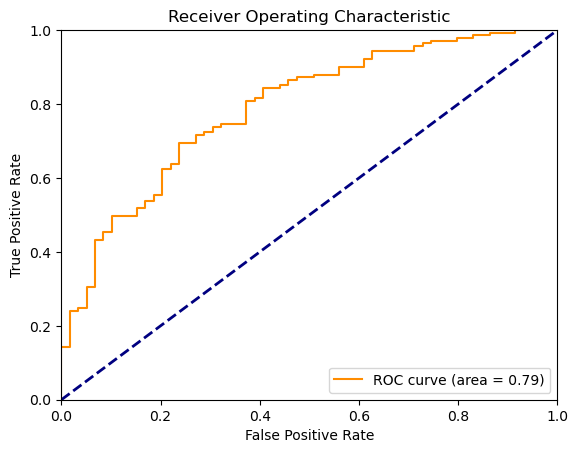

In [4]:
# get the data
X, y = german_credit_data()

# split into test and train
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X,y,test_size=0.2, random_state=1)

# create and fit the model
model = XGBClassifierWrapper()
model.fit(X_train_clean, y_train_clean, X_test_clean, y_test_clean)

# evaluate the model
model.evaluate(X_test_clean, y_test_clean)



In [8]:
params = {'model': model,
          'data': X,
          'target': y,
          'custom_explainer':None,
          'verbose': False,
          'mode': 'classification',
          'metric': 'AUC',
          'default_explainers': ['shap', 'permutations'],
          'verbose': True}

feature_elim = FeatureElimination(**params)

feature_elim.best_result()

Explainers: 100%|██████████| 2/2 [05:24<00:00, 162.42s/it]


AUC    0.6248
dtype: float64

<h3>The bank marketing dataset</h3>

In [5]:
# get the data
X, y = bank_marketing()

# split into test and train
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X,y,test_size=0.2, random_state=1)

<h2>Improving the model</h2>